In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

In [2]:
test = pd.read_csv('./data/test.csv')
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
test.shape

(4209, 377)

In [4]:
train = pd.read_csv('./data/train.csv')
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.tail()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0
4208,8417,110.85,z,r,ae,c,d,aa,g,w,...,1,0,0,0,0,0,0,0,0,0


In [6]:
train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train.shape

(4209, 378)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


#### 결측치가 없음

In [9]:
train.isna().sum().sum()

0

In [10]:
train.dtypes.value_counts()

int64      369
object       8
float64      1
dtype: int64

In [11]:
train.columns[train.dtypes==object]

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [12]:
train.columns[train.dtypes=='int64']

Index(['ID', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=369)

In [13]:
train.columns[train.dtypes=='float64']

Index(['y'], dtype='object')

### feature 구분
- X0 ~ X6, X8 : categorical feature

- other features : binary feature(0 / 1)

In [14]:
train.columns[2:10]

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [15]:
train.columns[10:]

Index(['X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=368)

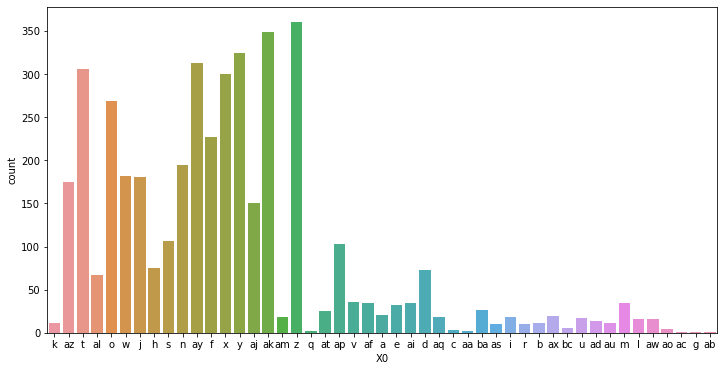

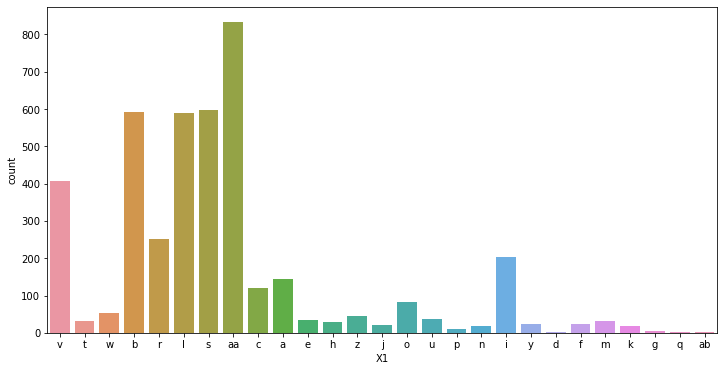

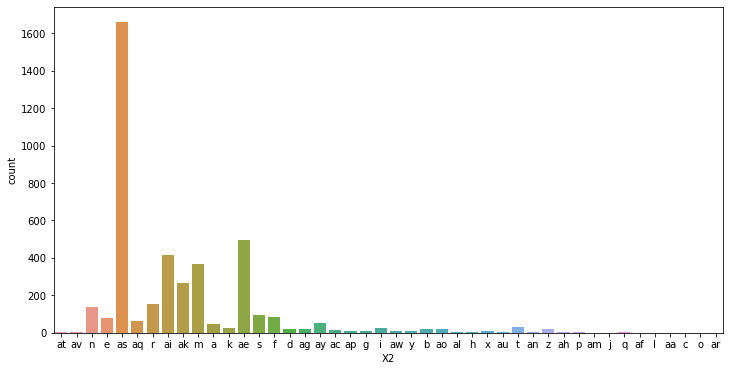

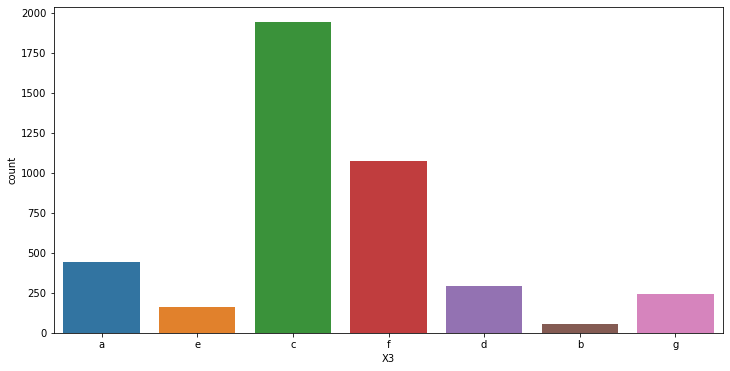

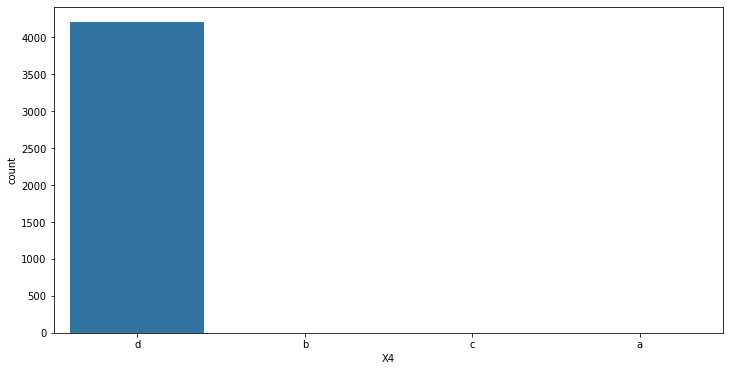

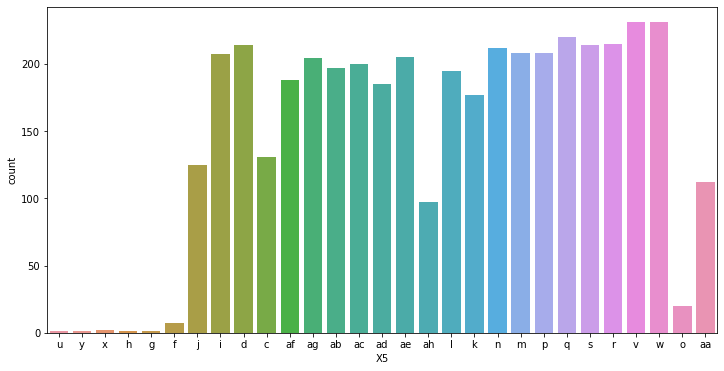

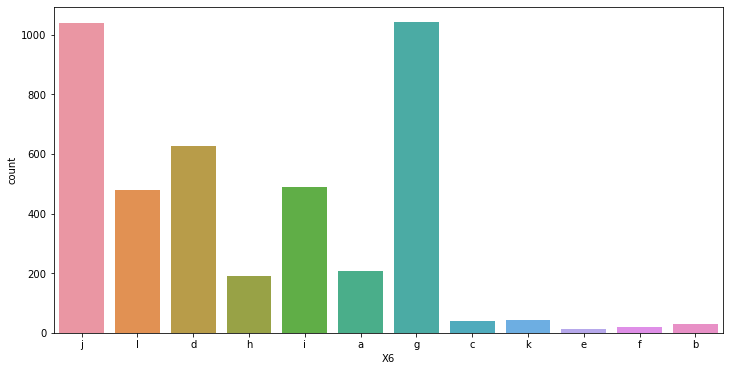

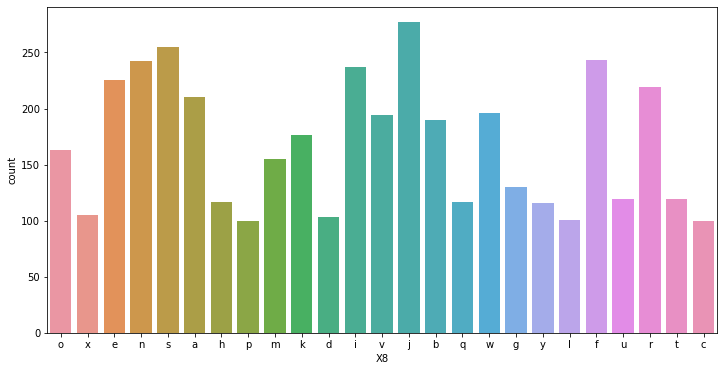

In [16]:
# categorical feature들 확인
for col in train.columns[2:10]:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=train, x=col) # X0 ~ X8
    plt.show()

In [17]:
train['X4'].value_counts()

d    4205
a       2
b       1
c       1
Name: X4, dtype: int64

#### 'X4' 값이 a, b, c 인 값을 찾아봄

In [18]:
train[train['X4']=='c']

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1308,2584,134.04,ak,e,ap,c,c,ac,j,j,...,0,0,1,0,0,0,0,0,0,0


In [19]:
train[train['X4']=='b']

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1307,2581,112.8,ap,l,s,c,b,ac,j,l,...,0,0,0,0,0,0,0,0,0,0


In [20]:
train[train['X4']=='a']

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1309,2585,96.69,z,r,ae,c,a,ac,a,s,...,1,0,0,0,0,0,0,0,0,0
1310,2586,105.51,aj,u,as,c,a,ac,d,n,...,1,0,0,0,0,0,0,0,0,0


In [21]:
# X3=c X5=ac

train[1307:1311]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1307,2581,112.80,ap,l,s,c,b,ac,j,l,...,0,0,0,0,0,0,0,0,0,0
1308,2584,134.04,ak,e,ap,c,c,ac,j,j,...,0,0,1,0,0,0,0,0,0,0
1309,2585,96.69,z,r,ae,c,a,ac,a,s,...,1,0,0,0,0,0,0,0,0,0
1310,2586,105.51,aj,u,as,c,a,ac,d,n,...,1,0,0,0,0,0,0,0,0,0


#### binary feature들 중 동일한 값 가지고 있음 -> 제거

In [24]:
train.columns[train.nunique()==2]

Index(['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=356)

In [25]:
train.columns[train.nunique()==1]

Index(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347'],
      dtype='object')

In [26]:
len(train.columns[train.nunique()==1])

12

In [27]:
categorical_features = train.columns[2:10]
categorical_features

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [28]:
temp = train.columns[10:]
temp

Index(['X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=368)

In [29]:
card1 = train.columns[train.nunique() == 1]
card1

Index(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347'],
      dtype='object')

In [30]:
train[categorical_features]

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


### 이상치 확인

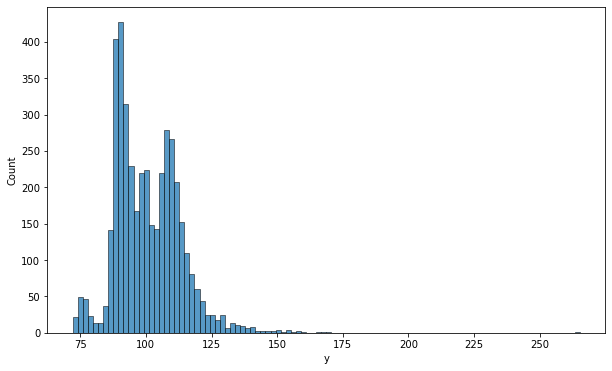

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x="y", bins=100)
plt.show()

In [32]:
Q1 = train['y'].quantile(0.25)
Q3 = train['y'].quantile(0.75)

IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print('Minimum : ',lower_whisker)
print('Maximum : ',upper_whisker)

Minimum :  63.534999999999975
Maximum :  136.29500000000002


In [33]:
# Minimum에 속하는 값은 없음

train[train.y<lower_whisker]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385


In [34]:
outlier_index = train[(train.y > upper_whisker)].index
outlier_index

Int64Index([  43,  203,  216,  253,  342,  420,  429,  681,  846,  883,  889,
             900,  995,  998, 1033, 1036, 1060, 1141, 1203, 1205, 1269, 1279,
            1349, 1459, 1730, 2240, 2263, 2348, 2357, 2376, 2414, 2470, 2496,
            2735, 2736, 2852, 2887, 2888, 2905, 2983, 3028, 3090, 3133, 3177,
            3215, 3442, 3744, 3773, 3980, 4176],
           dtype='int64')

In [35]:
train = train.drop(outlier_index)

In [36]:
## 이상치 제거 후 train row 수가 4209 -> 4159

train.shape

(4159, 378)

### feature engineering
1. Correlation
2. feature importance
3. PCA


In [37]:
# feature engineering을 위해 tempX, y 생성

total = pd.concat([train, test])
split_point = len(train)

#categorical -> one-hot-encording
total_OHE = pd.get_dummies(data=total, columns=categorical_features)

##### categorical feature one-hot-encording

In [38]:
total_OHE

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,130.81,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,88.53,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,76.26,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,9,80.62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,NaN,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4206,8413,NaN,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4207,8414,NaN,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [39]:
y = train.y

In [40]:
tempX = total_OHE.drop(columns=["ID", "y"])

In [41]:
tempX

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4206,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4207,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [42]:
# binary feature 중 같은 값 가지고 있던 column 제거

tempX = tempX.drop(columns=card1)

In [43]:
tempX

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4206,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4207,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [44]:
trainX = tempX[:split_point]
testX = tempX[split_point:]
print(trainX.shape, testX.shape, y.shape)

(4159, 566) (4209, 566) (4159,)


In [45]:
trainX

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4206,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [46]:
testX

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4206,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4207,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### 1. Correlation 

In [47]:
# 1. correlation

# 중복정보가 있는 column 제거하기 위해 상관계수를 확인해봅니다.
def remove_collinearity(X, threshold):
    """
    X : feature matrix
    threshold : 다중공선성을 제거할 column을 고르는 기준 값. [0, 1]
    """
    
    corr = X.corr()
    candidate_cols = []
    
    for x in corr.iterrows():
        idx, row = x[0], x[1] # decoupling tuple
        # 해당 row는 이미 처리가 되어서 볼 필요가 없다.
        if idx in candidate_cols:
            continue
        #print(row[row > 0.7].index[1:])
        candidates = row[row > threshold].index[1:]

        # 자기 자신을 제외하고 threshold를 넘는 column이 있다면,
        if len(candidates) != 0:
            for col in candidates:
                candidate_cols.append(col)           
    
    return candidate_cols

In [48]:
c = remove_collinearity(trainX, 0.7)

In [49]:
c

['X2_ay',
 'X191',
 'X223',
 'X224',
 'X251',
 'X2_as',
 'X260',
 'X2_am',
 'X2_c',
 'X2_ap',
 'X325',
 'X382',
 'X1_y',
 'X215',
 'X2_ai',
 'X2_ae',
 'X184',
 'X262',
 'X266',
 'X2_at',
 'X2_m',
 'X2_f',
 'X2_b',
 'X29',
 'X54',
 'X76',
 'X148',
 'X162',
 'X166',
 'X232',
 'X272',
 'X276',
 'X279',
 'X328',
 'X0_az',
 'X2_n',
 'X2_ag',
 'X35',
 'X37',
 'X200',
 'X2_a',
 'X39',
 'X2_i',
 'X2_z',
 'X302',
 'X317',
 'X161',
 'X202',
 'X247',
 'X356',
 'X267',
 'X52',
 'X66',
 'X75',
 'X113',
 'X126',
 'X130',
 'X134',
 'X147',
 'X170',
 'X198',
 'X222',
 'X264',
 'X306',
 'X0_ap',
 'X2_s',
 'X50',
 'X129',
 'X102',
 'X214',
 'X239',
 'X282',
 'X308',
 'X370',
 'X2_t',
 'X88',
 'X90',
 'X94',
 'X122',
 'X217',
 'X242',
 'X243',
 'X249',
 'X320',
 'X137',
 'X324',
 'X2_au',
 'X248',
 'X253',
 'X385',
 'X120',
 'X172',
 'X216',
 'X221',
 'X0_a',
 'X2_k',
 'X379',
 'X213',
 'X2_aw',
 'X331',
 'X349',
 'X352',
 'X367',
 'X84',
 'X241',
 'X244',
 'X379',
 'X98',
 'X101',
 'X128',
 'X265',
 'X3

In [50]:
len(c)

216

In [51]:
X = trainX.drop(columns=c)

In [52]:
testX = testX.drop(columns=c)

In [53]:
testX.shape

(4209, 374)

In [54]:
X.shape

(4159, 374)

In [55]:
X

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4206,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### 2. 변수 중요도

In [56]:
### max_features="sqrt" 전체 피쳐 중  √(피쳐개수)만큼 선정
### n_jobs : cpu 코어수 지정. n_jobs=-1 경우 컴퓨터의 모든 코어를 사용함

rfc = RandomForestRegressor(max_features="sqrt", n_jobs=-1, random_state=42)
rfc.fit(X, y)

RandomForestRegressor(max_features='sqrt', n_jobs=-1, random_state=42)

In [57]:
ftr_importances_values = rfc.feature_importances_


In [58]:
ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]

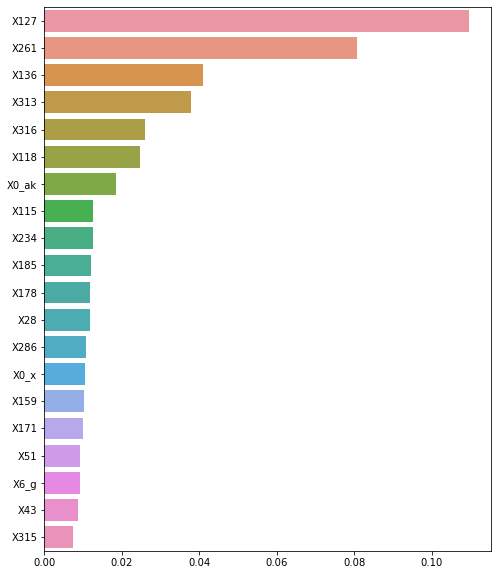

In [59]:
plt.figure(figsize=(8, 10))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [60]:
X = X[ftr_top.index]

### 3. PCA로 차원 축소

In [61]:
pca = PCA(n_components=0.95) # 원래 데이터의 95%를 보존하는 차원.
pca_095 = pca.fit(X) # 학습 및 변환
reduced_X = pca_095.transform(X)

In [62]:
reduced_X

array([[ 0.17680102, -0.36542815,  0.46818335, ..., -0.51809096,
         0.08035762,  0.18595978],
       [ 0.50475598, -0.52684569,  0.22800833, ...,  0.20418472,
         0.14348654,  0.01837257],
       [-0.53288242,  0.72613397,  0.76078747, ..., -0.58073394,
        -0.5448511 , -0.23087801],
       ...,
       [-0.75884296, -0.5795286 ,  0.40328236, ...,  0.27805618,
        -0.11272245,  0.02500776],
       [ 0.72928389,  1.16392487, -0.07306591, ...,  0.03234551,
        -0.37327103,  0.59820125],
       [ 0.70496238, -0.09869836,  0.13095886, ...,  0.15980484,
         0.17355299,  0.02094533]])

In [63]:
reduced_X.shape

(4159, 12)

In [64]:
y

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4159, dtype: float64

In [65]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(reduced_X, y, train_size=0.8, random_state=42)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(3327, 12) (832, 12) (3327,) (832,)


## RandomForestRegressor

In [66]:
rfr = RandomForestRegressor()
kf = KFold(random_state=42,
           n_splits=5,
           shuffle=True,
          )

In [67]:
param_grid = {
    'n_estimators': [5, 10, 25, 30, 50],
    'max_depth': [None,5,  8, 10, 15, 20],
    'min_samples_split': [0.01, 0.05, 0.1],
    'max_features': ['auto', 'sqrt','log2'],
}

In [68]:
grid_search = GridSearchCV(estimator=rfr, 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2
                          )

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 8, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [0.01, 0.05, 0.1],
                         'n_estimators': [5, 10, 25, 30, 50]},
             verbose=2)

In [69]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_split': 0.01,
 'n_estimators': 50}

In [70]:
grid_search.best_score_

0.6317491635469505

In [131]:
rf = RandomForestRegressor(n_estimators=50, max_depth=5, max_features='auto', min_samples_split=0.01)

In [132]:
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_split=0.01, n_estimators=50)

In [133]:
pred_train = rf.predict(x_train)

In [134]:
pred_val = rf.predict(x_val)

In [135]:
pred_val

array([111.5227081 ,  93.9005797 , 112.35527913, 111.44791603,
       114.47479902, 111.30425265,  93.97371718, 111.3708713 ,
       114.4036653 ,  94.16176268, 103.03434023,  94.03211597,
       111.63384808, 111.30425265,  94.05158711,  93.94371011,
        95.26703267, 111.3708713 ,  93.96378375, 111.30425265,
        94.28819489,  94.09818604, 111.3708713 ,  93.9149278 ,
       103.32965474,  94.03211597, 111.66599786, 111.5227081 ,
        94.06421829,  93.97813186, 111.30425265,  94.03211597,
        94.62880225,  94.03211597,  93.97813186, 102.93239395,
       111.32436032,  94.03878394,  78.66417091, 111.65419009,
       111.32436032, 103.32965474,  94.166189  ,  94.10161214,
       115.47796498,  93.96378375,  93.94371011,  93.87925415,
        94.07662796,  94.19018276,  94.0866958 ,  77.52999901,
       102.54515211,  94.10161214,  94.10161214, 111.44791603,
       111.15784858, 103.03434023, 111.44791603, 111.49750465,
        77.11314533,  94.25422713, 114.4036653 , 111.20

In [136]:
mse_train = mean_squared_error(y_train, pred_train)
mse_val = mean_squared_error(y_val, pred_val)
print(mse_train, mse_val)

45.64777401257165 46.17979537056158


In [137]:
from sklearn.metrics import mean_absolute_error

In [138]:
mae_train = mean_absolute_error(y_train, pred_train)
mae_val = mean_absolute_error(y_val, pred_val)

In [139]:
print(mae_train, mae_val)

4.7641455217645925 4.863819408357578


### test

In [89]:
testX = testX[ftr_top.index]

In [93]:
testX

,X127,X261,X136,X313,X316,X118,X0_ak,X115,X234,X185,X178,X28,X286,X0_x,X159,X171,X51,X6_g,X43,X315
0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0
1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,1,1,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0
4,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
4205,1,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4206,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4207,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0


In [94]:
pca = PCA(n_components=0.95) # 원래 데이터의 95%를 보존하는 차원.
pca_testX_095 = pca.fit(testX) # 학습 및 변환
reduced_testX = pca_testX_095.transform(testX)

In [100]:
prediction = rfc.predict(reduced_testX)
prediction

array([ 77.64893675,  94.04549573,  78.50119957, ...,  93.8856321 ,
       111.40417622,  93.98891903])

In [103]:
prediction.shape

(4209,)

In [125]:
result = test[['ID']]

In [128]:
result['y'] = prediction

C:\Users\82107\AppData\Local\Temp/ipykernel_8344/915186146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['y'] = prediction


In [129]:
result

,ID,y
0,1,77.648937
1,2,94.045496
2,3,78.501200
3,4,77.648937
4,5,111.236445
...,...,...
4204,8410,102.647559
4205,8411,93.988919
4206,8413,93.885632
4207,8414,111.404176
